In [1]:
import meep as mp
from meep import mpb

import numpy as np

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})
# for Palatino and other serif fonts use:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})

In [2]:
import sys
sys.path.append("/home/ben/Desktop/MSc thesis/github/Thesis_name/Simulations/")
from ExternalFunctions import (calculate_ifield, plot_field_2D_YZ,  plot_field_2D_XZ,
                              plot_field_2D_XY, plot_intentsity_in_z_axis, geom_square_PCS_slope,
                              plot_unit_cell_cross_sections)

In [3]:
save = True
plot = True
simulate = False

In [4]:
resolution = 12
num_bands = 4

a = 290 # nm
r = 103 / a 
t = 200 / a

sx = 1 
sy = 1 
sz = 10 
cell = mp.Vector3(sx, sy, sz)
geometry_lattice = mp.Lattice(size=mp.Vector3(1, 1, sz))

dielec_const = 1.9935
alpha = 7.9 * np.pi / 180
params = dielec_const, r, t, alpha

custom_material = True

eps_func = geom_square_PCS_slope(params)
default_material = eps_func

-----------
Initializing structure...
time for choose_chunkdivision = 7.15256e-06 s
Working in 3D dimensions.
Computational cell is 1 x 1 x 10 with resolution 24
subpixel-averaging is 36.5139% done, 6.99181 s remaining
subpixel-averaging is 75.0201% done, 1.35142 s remaining
subpixel-averaging is 38.5056% done, 6.41078 s remaining
subpixel-averaging is 77.6757% done, 1.15032 s remaining
subpixel-averaging is 37.8417% done, 6.59715 s remaining
subpixel-averaging is 77.0118% done, 1.21261 s remaining
time for set_epsilon = 31.6806 s
-----------


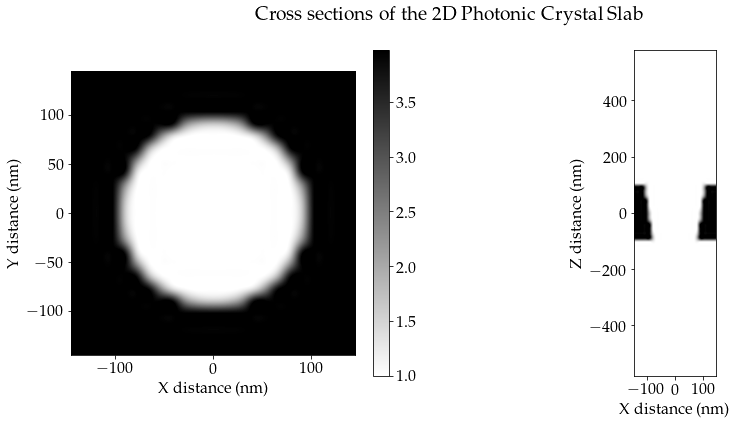

In [5]:
sim_params = resolution, cell, default_material

a = 290 #nanometers

fig, ax = plot_unit_cell_cross_sections(a, sim_params, custom_material)

In [6]:
num_period = 3
k_point = mp.Vector3(0.5,0.0,0.0)

sim_params = geometry_lattice,  k_point, default_material, resolution, num_bands

field, converted_eps = calculate_ifield(sim_params, num_period, custom_material)

Initializing eigensolver data
Computing 4 bands with 1e-07 tolerance
Working in 3 dimensions.
Grid size is 24 x 24 x 240.
Solving for 4 bands at a time.
Creating Maxwell data...
Mesh size is 3.
Lattice vectors:
     (1, 0, 0)
     (0, 1, 0)
     (0, 0, 10)
Cell volume = 10
Reciprocal lattice vectors (/ 2 pi):
     (1, -0, 0)
     (-0, 1, -0)
     (0, -0, 0.1)
Geometric objects:
Geometric object tree has depth 1 and 0 object nodes (vs. 0 actual objects)
Initializing epsilon function...
Allocating fields...
Solving for band polarization: zeven.
Initializing fields to random numbers...
1 k-points
  Vector3<0.5, 0.0, 0.0>
elapsed time for initialization: 138.71959233283997
solve_kpoint (0.5,0,0):
Solving for bands 1 to 4...
zevenfreqs:, 1, 0.5, 0, 0, 0.5, 0.332803, 0.408332, 0.503074, 0.503334
elapsed time for k point: 54.759557008743286
Fixing e-field (band 1) phase by -0.889744 + -0.456461i; max ampl. = 1.49741
Fixing e-field (band 2) phase by -0.359922 + 0.932982i; max ampl. = 1.55288
F

(<Figure size 864x720 with 2 Axes>,
 <AxesSubplot:title={'center':'YZ projection of I field'}, xlabel='Z distance (nm)', ylabel='Y distance (nm)'>)

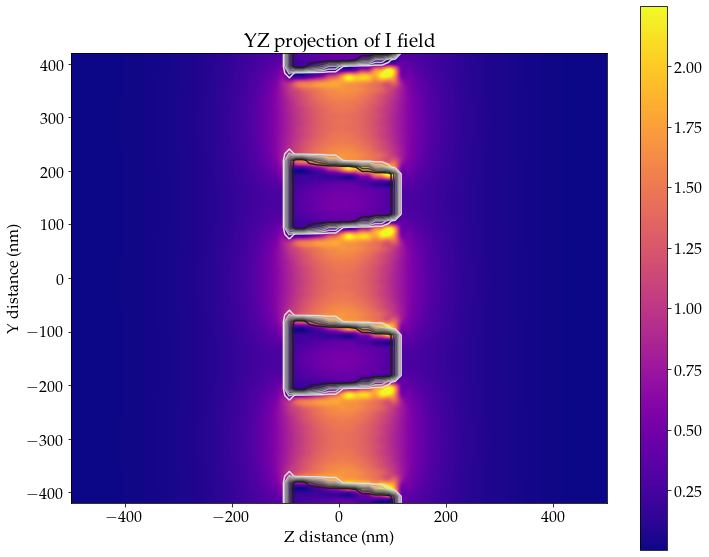

In [7]:
eps = converted_eps.T
a = 290  # nanometers
num_band = 1


ylim = [-420,420]
zlim = [-500,500]
title = 'YZ projection of I field'

plot_field_2D_YZ(eps, np.array(field), a, resolution, num_band, ylim, zlim, title)

3 69 3 69


(<Figure size 864x720 with 2 Axes>,
 <AxesSubplot:title={'center':'XY projection of I field'}, xlabel='X distance (nm)', ylabel='Y distance (nm)'>)

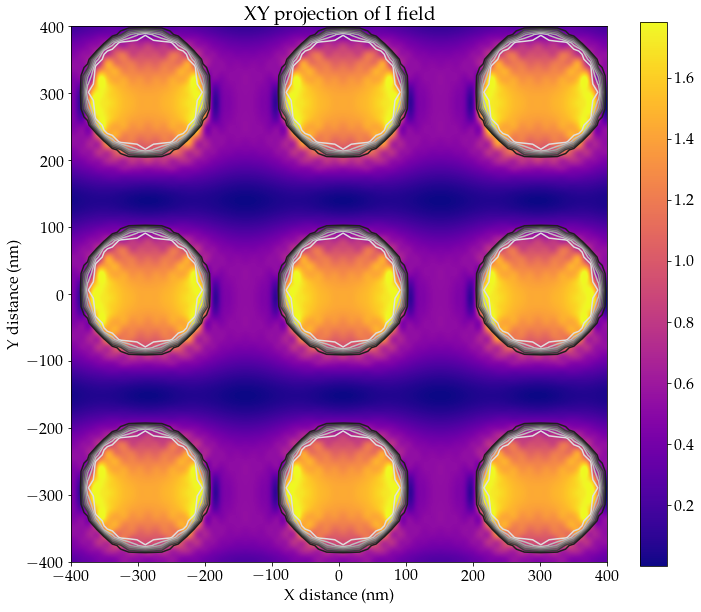

In [8]:
xlim = [-400,400]
ylim = [-400,400]
title = 'XY projection of I field'

plot_field_2D_XY(eps, np.array(field), a, resolution, num_band, xlim, ylim, title)

(<Figure size 864x720 with 2 Axes>,
 <AxesSubplot:title={'center':'XZ projection of I field'}, xlabel='Z distance (nm)', ylabel='X distance (nm)'>)

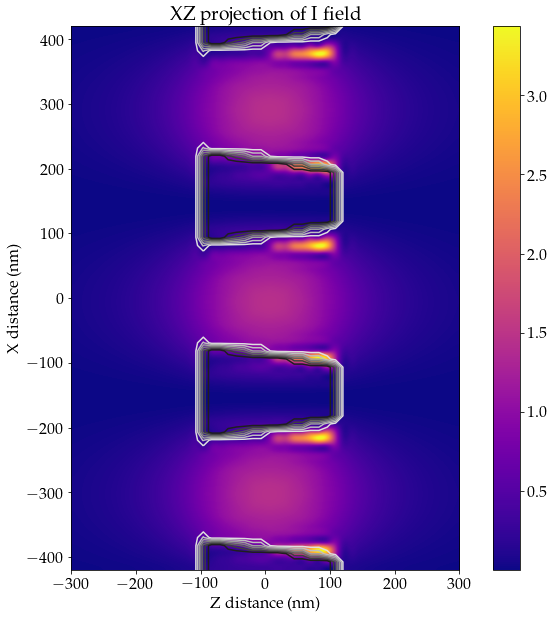

In [9]:
xlim = [-420,420]
zlim = [-300,300]
title = 'XZ projection of I field'

plot_field_2D_XZ(eps, np.array(field), a, resolution, num_band, xlim, zlim, title)

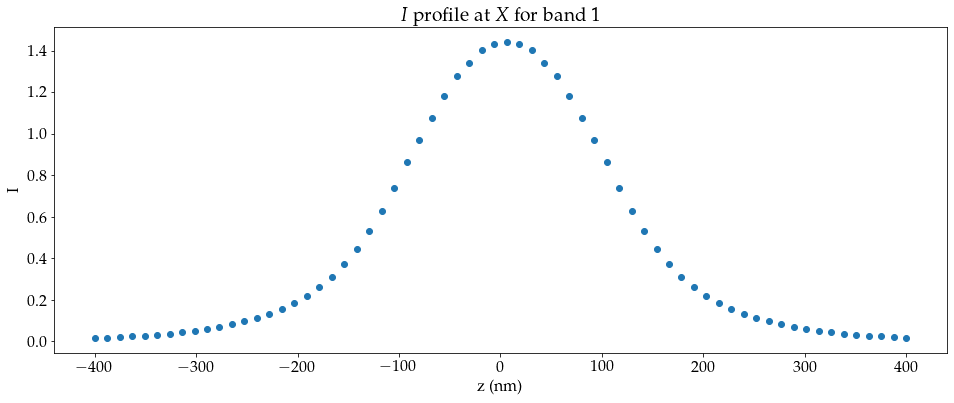

In [16]:
title = '$I$ profile at $X$ for band 1'
zlim = [-400,400]
num_band = 1

fig, ax = plot_intentsity_in_z_axis(field, a, resolution, num_band,zlim, title)

# 